In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's create a few noisy signals so we can compare the autocorrelation among them. Let's try two different noise statistics - uniform and Gaussian - and two noise spectra or "colors" - white or thermal noise, and pink or 1/f noise. The pink noise is generated by using the white noise as the point-to-point difference for a random walk.

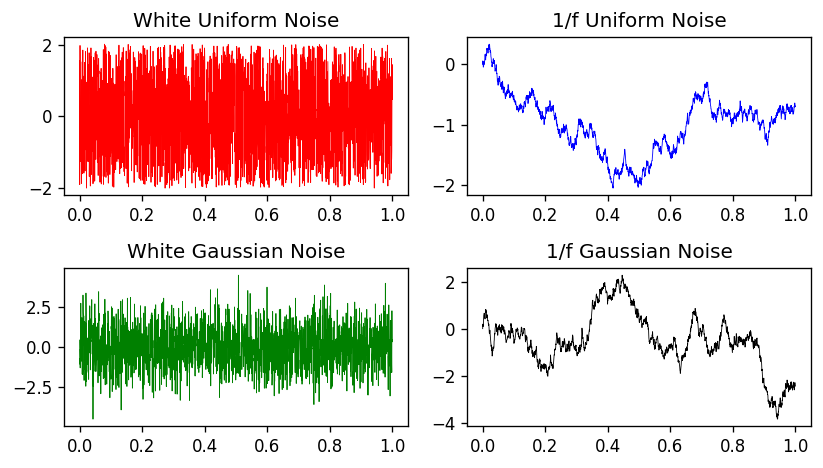

In [3]:
import numpy as np
import matplotlib.pyplot as plt

'''
a comparison on correlation functions and fourier transforms for several
stochastic inputs

'''

N = 2001 # number of points

t = np.linspace(0,1,N)

noise_uni = np.random.rand(N)-0.5
noise_norm = np.random.normal(0,0.5,size=N)

walk_uni = t*0
walk_norm = t*0

for i in range(0,len(t)-1):
    
    walk_uni[i+1] = walk_uni[i] + np.random.rand()-0.5
    walk_norm[i+1] = walk_norm[i] + np.random.normal(0,0.5)
    
    
## normalizing step:

def normalize(noise):
    
    return noise/np.mean(np.abs(noise))

noise_uni = normalize(noise_uni)
noise_norm = normalize(noise_norm)
walk_uni = normalize(walk_uni)
walk_norm = normalize(walk_norm)
    
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7,4), dpi=120)
axs[0,0].plot(t,noise_uni,'r', linewidth=0.5)
axs[0,0].set_title('White Uniform Noise')

axs[1,0].plot(t,noise_norm,'g', linewidth=0.5)
axs[1,0].set_title('White Gaussian Noise')

axs[0,1].plot(t,walk_uni,'b', linewidth=0.5)
axs[0,1].set_title('1/f Uniform Noise')

axs[1,1].plot(t,walk_norm,'k', linewidth=0.5)
axs[1,1].set_title('1/f Gaussian Noise')

fig.tight_layout()


Now let's compute the Fourier transform

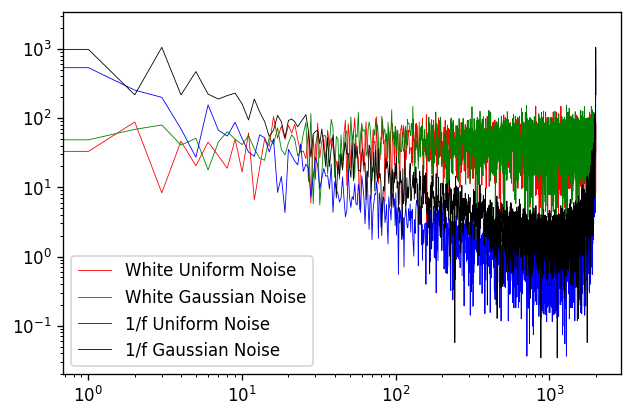

In [4]:

fft_noise_uni = np.fft.fft(noise_uni)
fft_noise_norm = np.fft.fft(noise_norm)
fft_walk_uni = np.fft.fft(walk_uni)
fft_walk_norm = np.fft.fft(walk_norm)

freq = N*t/(t[-1])

plt.figure(2, dpi=120)
plt.clf()
plt.loglog(freq, np.abs(fft_noise_uni),'r',label='White Uniform Noise', linewidth=0.5)
plt.loglog(freq, np.abs(fft_noise_norm),'g',label='White Gaussian Noise', linewidth=0.5)
plt.loglog(freq, np.abs(fft_walk_uni),'b',label='1/f Uniform Noise', linewidth=0.5)
plt.loglog(freq, np.abs(fft_walk_norm),'k',label='1/f Gaussian Noise', linewidth=0.5)
plt.legend()


We see where the 1/f noise gets its name. Next, I've implemented an intuitive calculation for the autocorrelation.

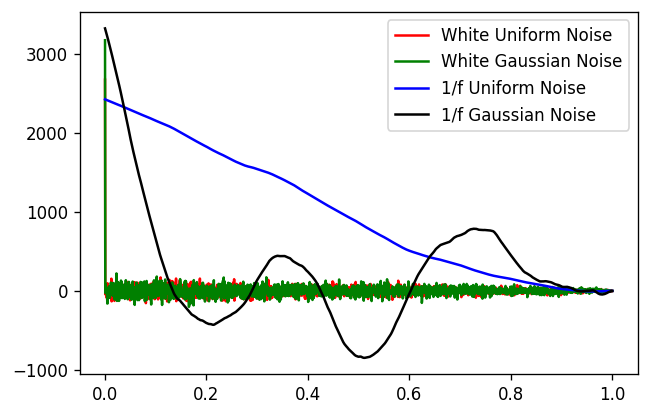

In [5]:
def correlation(x):
    
    '''
    to calculate the correlation, I pick the first N points in the series x, and 
    multiply with the next N+m points, adding up along m
    '''
    x000 = np.concatenate((x,np.zeros(len(x))))
    
    cumm_corr = np.zeros(len(x))
    
    for i in range(0,len(x)):
        
        corr = np.zeros(len(x))
        
        for j in range(0,len(x)-1):
            
            corr[j] = x000[i]*x000[i+j]
            
        cumm_corr += corr
        
    return cumm_corr

corr_noise_uni = correlation(noise_uni)
corr_noise_norm = correlation(noise_norm)
corr_walk_uni = correlation(walk_uni)
corr_walk_norm = correlation(walk_norm)


plt.figure(dpi=120)
plt.clf()
plt.plot(t, corr_noise_uni,'r',label='White Uniform Noise')
plt.plot(t, corr_noise_norm,'g',label='White Gaussian Noise')
plt.plot(t, corr_walk_uni,'b',label='1/f Uniform Noise')
plt.plot(t, corr_walk_norm,'k',label='1/f Gaussian Noise')
plt.legend()

Finally, to test our intuitive implementation, we can use the Weiner-Khinchin theorem to calcuate the autocorrelation from the spectral density (modulus squared of the Fourier transform)

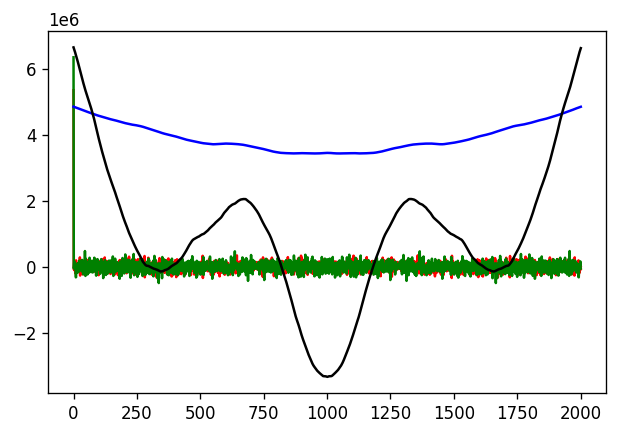

In [6]:
S_noise_uni = np.abs(fft_noise_uni)**2
S_noise_norm = np.abs(fft_noise_norm)**2
S_walk_uni = np.abs(fft_walk_uni)**2
S_walk_norm = np.abs(fft_walk_norm)**2

R_noise_uni = np.fft.fft(S_noise_uni)
R_noise_norm = np.fft.fft(S_noise_norm)
R_walk_uni = np.fft.fft(S_walk_uni)
R_walk_norm = np.fft.fft(S_walk_norm)

plt.figure(dpi=120)
plt.plot(freq, np.real(R_noise_uni),'r',label='White Uniform Noise')
plt.plot(freq, np.real(R_noise_norm),'g',label='White Gaussian Noise')
plt.plot(freq, np.real(R_walk_uni),'b',label='1/f Uniform Noise')
plt.plot(freq, np.real(R_walk_norm),'k',label='1/f Gaussian Noise')

$wag